# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.options.display.float_format = '{:20,.2f}'.format #Supress scientific notation

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
 print(boston['DESCR'])   # descripción del dataset
 #boston['data']           # matriz con los datos de entrada (atributos)
 #boston['target']         # vector de valores a predecir
 #boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [5]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1) El conjunto de datos se trata de informacióón demográfica y de zonificación la ciudad de Boston y el valor mediano de las propiedades clasificadas en suburbios en unidades de 1000 USD.

2) La variable objetivo a predecir es el valor mediano precio de residencias clasificadas por suburbios. El significado que tiene es el valor mediano de las casas ocupadas por sus dueños en unidades de 1000 USD.

3) La información disponible para hacer la predicción es la siguiente:


*   CRIM: razón de crimen por capita por suburbio
*   ZN: proporción de tierra residencial para lotes de más de 25000 sq.ft.
*   INDUS: proporción de acres de parques industriales  por suburbio. 
*   CHAS: Variable Charles River, si es 1 está al lado de un río, es 0 caso contrario.
*   NOX: Concentración de óxido nitroso (partes por 10 millones)
*   RM: promedio de habitaciones por residencia
*   AGE: proporcion de unidades ocupadas por sus dueños construidas antes de 1940
*   RAD: índice de accesibilidad a autopistas radiales (?)
*   TAX: proporción del impuesto a la propiedad por 10000 USD     
*   PTRATIO: proporción profesor-alumno para el suburbio
*   B: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afrodescendiente por suburbio.
*   LSTAT: % de la población de estatus socioeconómico bajo

4) Imaginamos que los más importantes para la predicción serán: TAX, RM, CRIM, NOX.

5) Un problema en el conjunto de datos es que falta la información de cómo se obtiene la variable LSTAT, de donde sale el criterio para la variable B y de donde se obtienen los datos de CRIM. 
En cuanto a sesgos y problemas éticos, consideramos que la variable CRIM puede tener sesgos debido a que puede estar distorcionada dado que la mayoría de los crímenes no se denuncian. La variable B puede representar un dilema ético por la segregación racial histórica de EEUU, y la falta de información del criterio de la ecuación para obtenerla. Por último la variable LSTAT tampoco se encuentra definida su obtención y que considera población de estatus bajo.
En cuanto a predicciones futuras, hay demasiados valores dependientes del momento en que se obtuvieron los datos, pero que no necesariamente se van a mantener en el tiempo. Además nos parece que falta información que sí sería relevante en el futuro como la fecha de construcción y el dataset en sí es dependiente de que se mantenga actualizado. 

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

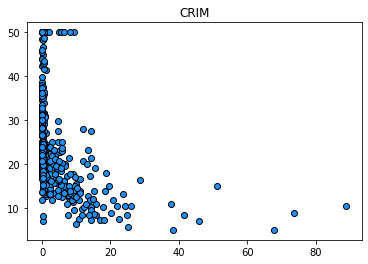

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

----

In [ ]:
combined_array = np.hstack((boston['data'], np.split(boston['target'], indices_or_sections=506)))

boston_df = pd.DataFrame(combined_array)
boston_df.columns = boston['feature_names'].tolist() + list(['TARGET'])

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


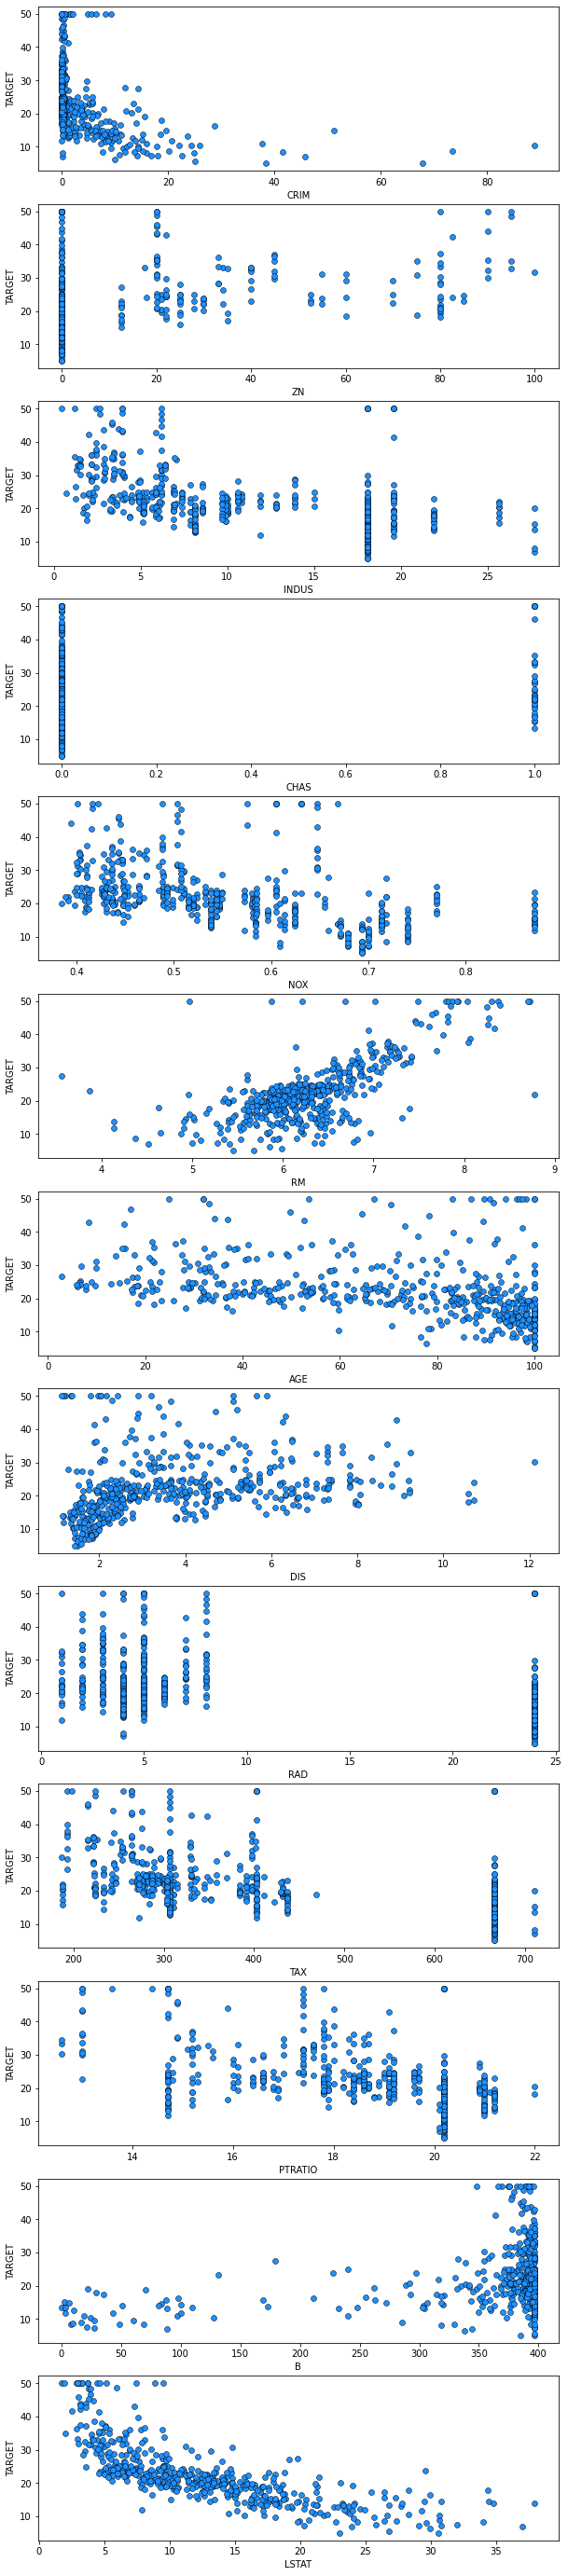

In [ ]:
fig, axes = plt.subplots(13,1, figsize=(10,50))

for h,i in enumerate(boston['feature_names']):
    sns.scatterplot(data=boston_df, x=i, y='TARGET', ax=axes[h,], facecolor="dodgerblue", edgecolor="k")

Para nosotros los atributos más importantes son (en ordern de importancia):

*   LSTAT: % de la población de estatus socioeconómico bajo
*   RM: promedio de habitaciones por residencia

Ya que se ve una distribución más lineal de los datos en ambos casos.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Resolver acá. Ayuda:

feature = 'LSTAT'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# 2. Instanciar y entrenar acá.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()  
lr.fit(X_train_f, y_train)

print(lr.coef_)
print(lr.intercept_)

[-0.95648761]
34.76519272372788


In [ ]:
# 3. Predecir y evaluar acá.

from sklearn.metrics import mean_squared_error

y_train_pred = lr.predict(X_train_f)
y_test_pred = lr.predict(X_test_f)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {round(train_error)}')
print(f'Test error: {round(test_error)}')

Train error: 37
Test error: 46


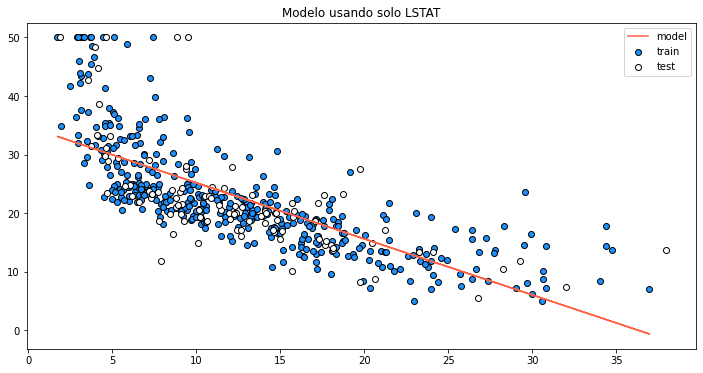

In [ ]:
# 4. Graficar acá. Ayuda:

fig, axes = plt.subplots(figsize=(12,6))

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(X_train_f, lr.predict(X_train_f), color="tomato", label="model") 
plt.title(f'Modelo usando solo {feature}')
plt.legend()
plt.show()

El modelo de regresión lineal es el modelo más simple para ajustar datos. El conjunto de datos se distribuye de una manera no completamente lineal, esto se evidencia principalmente en los extremos del eje X, donde además el modelo no ajusta correctamente por la misma curvatura de los datos. En la parte central que se asemeja más a una línea recta ajusta mejor que en los extremos. Esto nos indicaría que habría que emplear un modelo que no sea lineal, sino un modelo polinomial. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression()
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = round(mean_squared_error(y_train, y_train_pred), 2)
    test_error = round(mean_squared_error(y_test, y_test_pred), 2)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

print(degrees)
print(train_errors)
print(test_errors)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[85.14, 36.52, 28.19, 26.78, 25.85, 25.03, 25.01, 25.01, 24.85, 24.83]
[81.58, 46.34, 38.85, 37.22, 34.7, 34.83, 34.33, 34.26, 36.42, 34.86]


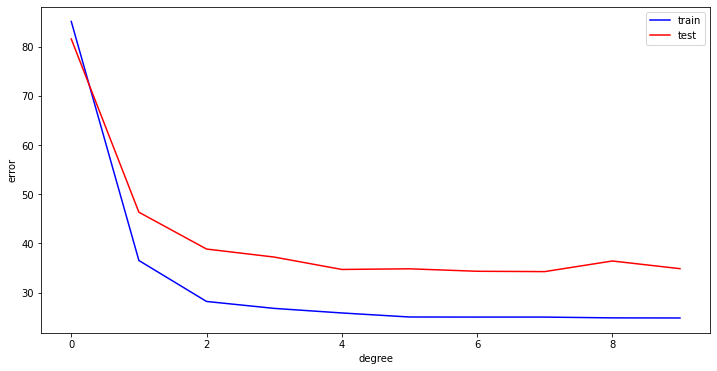

In [ ]:
# 2. Graficar curvas de error acá.

fig, axes = plt.subplots(figsize=(12,6))

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

A partir del séptimo grado del polinomio el error en test comienza a aumentar, lo que indica la presencia de sobreajuste.

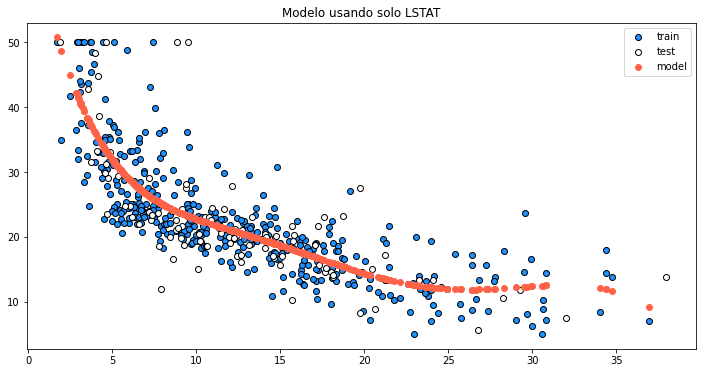

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.

# train:
pf = PolynomialFeatures(7)
lr = LinearRegression()
model = make_pipeline(pf, lr)
model.fit(X_train_f, y_train)

# predict:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

# plot
fig, axes = plt.subplots(figsize=(12,6))

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.scatter(X_train_f, model.predict(X_train_f), color="tomato", label="model") #si uso plt.plot los puntos al estar desordenados hacen puro ruido
plt.title(f'Modelo usando solo {feature}')
plt.legend()
plt.show()

Como podemos ver en el gráfico este modelo se ajusta mejor a los datos, esto se evidencia en los valores del error de entrenamiento y de test para la regresión lineal y el polinomio:

* Errores cuadráticos del polinomio de gr 7: entrenamiento 25 y test 34
* Errores de la regresión lineal: entrenamiento 37, test 46



## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):

selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
# 1. Resolver acá. Buscamos el mejor modelo de regresión polinomial para ambas variables.

train_errors = []
test_errors = []
degrees = [ 1, 2, 3, 4, 5, 6, 7, 8, 9]

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression()
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = round(mean_squared_error(y_train, y_train_pred), 2)
    test_error = round(mean_squared_error(y_test, y_test_pred), 2)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

print(degrees)
print(train_errors)
print(test_errors)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[28.79, 18.66, 17.08, 14.19, 12.91, 12.35, 12.14, 12.17, 14.02]
[37.38, 28.14, 28.57, 34.0, 34.2, 34.93, 158.24, 736.49, 701.44]


El mejor modelo de regresión polinomial con las dos variables seleccionadas resulta del polinomio de grado 2.
Si comparamos los errores cuadráticos medios de la regresión polinomial con un solo feature vs la regresión con dos freatures, observamos que el error disminuye al haber agregado el 2do feature. Esto depende del feature que se agregue, en este caso el elegido agregaba información relevante para el modelo, pero una mala elección podría agregar ruido. 

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [ ]:
X_train_full = X_train
X_test_full = X_test
X_train_full.shape, X_test_full.shape

#train
lr = LinearRegression()  
lr.fit(X_train_full, y_train)

#predict
y_train_pred = lr.predict(X_train_full)
y_test_pred = lr.predict(X_test_full)

#evaluate
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {round(train_error)}')
print(f'Test error: {round(test_error)}')